MTH 452 Final Project- Jackson Lyons

In [31]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Finite Difference Method

In [32]:
# Define problem
N=10
a, b = 0, 1
u0, u1 = 0, 0
h = (b-a) / (N)
x = np.linspace(a, b, N+1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [33]:
# Define exact solution
def exact(x):
    return x**2 - x

In [34]:
# Define p(x), q(x), r(x)
def p(x):
    return 1/x
def q(x):
    return -4/x
def r(x):
    return -4*x-(1/x)+8

In [35]:
# Get A
A = np.zeros((N+1, N+1))
A[0, 0] = 1
A[N, N] = 1
for i in range(1, N):
    A[i, i-1] = 1-0.5*h*p(x[i]) # Subdiagonal
    A[i, i] = -2+h**2*q(x[i]) # Diagonal
    A[i, i+1] = 1+0.5*h*p(x[i]) # Superdiagonal

In [36]:
# Get b
b = np.zeros(N+1)
b[0] = u0
b[N-1] = u1
for i in range(1, N):
    b[i] = h**2*r(x[i])

In [37]:
# solve equation AU=b
U = la.solve(A, b)

array([ 0.  , -0.09, -0.16, -0.21, -0.24, -0.25, -0.24, -0.21, -0.16,
       -0.09,  0.  ])

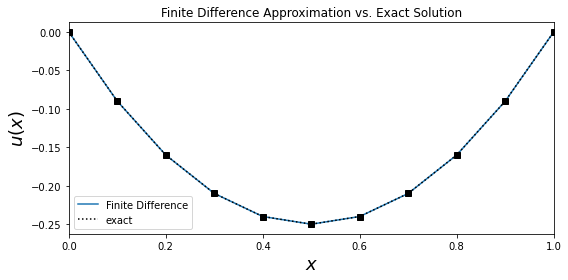

In [38]:
# Plot FDM solution
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, U, label='Finite Difference')
ax.plot(x, U, 'ks')
plt.plot(x, exact(x),'k:',label='exact')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
ax.set_title('Finite Difference Approximation vs. Exact Solution')
plt.legend(loc='best')

plt.tight_layout()
U

Max error = 1.665e-16


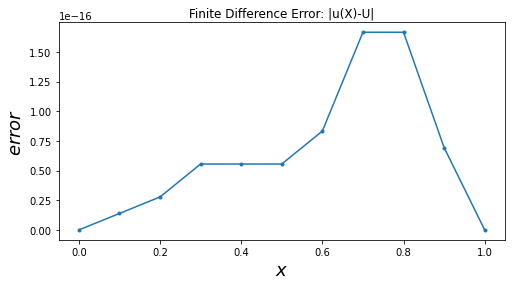

In [39]:
# Plot the error |u(x)-U| in the gridpoints
fig, ax = plt.subplots(figsize=(8, 4))
error = abs(exact(x)-U)
ax.plot(x, error,'.-')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$error$", fontsize=18)
ax.set_title('Finite Difference Error: |u(X)-U|');
print('Max error = {:.3e}'.format(max(abs(error))))

Finite Element Method

In [40]:

# fem1d_bvp_linear is a Python function which applies the finite element method, 
# with piecewise linear elements, to a two point boundary value problem.
# Reference:
# ***************************************************************************************
# *    Title: fem1d_bvp_linear source code
# *    Author: John Burkardt
# *    Date: 09 January 2015
# *    Availability: https://people.math.sc.edu/Burkardt/py_src/fem1d_bvp_linear/fem1d_bvp_linear.html
# ***************************************************************************************
from fem1d_bvp_linear import fem1d_bvp_linear

# Define problem
n=11

In [41]:
# BVP to be solved has form: - d/dx ( a(x) * du/dx ) + c(x) * u(x) = f(x)
# define functions for a(x), c(x), f(x) for problem
def a00(x):
    return x
def c00(x):
    return 4
def f00(x):
    return 4*x**2 - 8*x +1

In [42]:
U2 = fem1d_bvp_linear(n, a00, c00, f00, x)
U2

array([ 0.        , -0.09102571, -0.16115693, -0.21115043, -0.24108569,
       -0.25098312, -0.24084912, -0.21068511, -0.16049034, -0.09026288,
        0.        ])

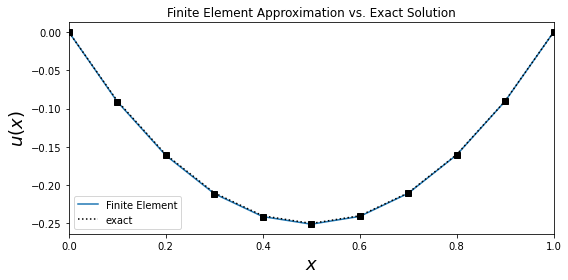

In [43]:
# Plot FEM solution
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, U2, label='Finite Element')
ax.plot(x, U2, 'ks')
plt.plot(x, exact(x),'k:',label='exact')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
ax.set_title('Finite Element Approximation vs. Exact Solution')
plt.legend(loc='best')

plt.tight_layout()

Max error = 1.157e-03


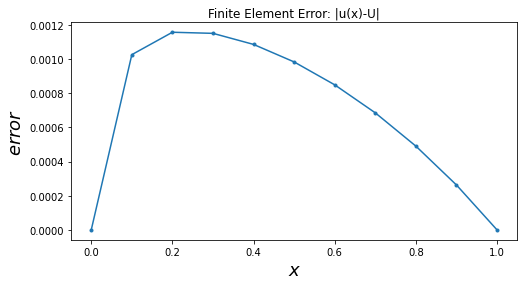

In [44]:
# Plot the error |u(x)-U2| in the gridpoints
fig, ax = plt.subplots(figsize=(8, 4))
error = abs(exact(x)-U2)
ax.plot(x, error,'.-')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$error$", fontsize=18)
ax.set_title('Finite Element Error: |u(x)-U|')
print('Max error = {:.3e}'.format(max(abs(error))))

Compare Finite Difference vs Finite Element methods

Max error for FDM = 1.665e-16
Max error for FEM = 1.157e-03


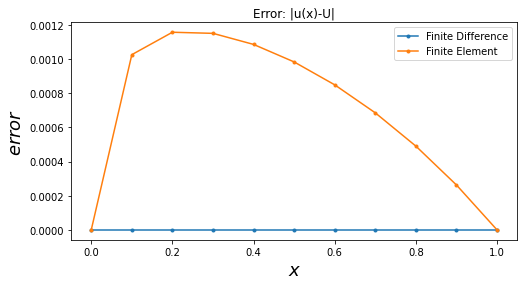

In [45]:
# Plot the error for both FDM and FEM
fig, ax = plt.subplots(figsize=(8, 4))
error1 = abs(exact(x)-U)
error2 = abs(exact(x)-U2)
ax.plot(x, error1,'.-', label='Finite Difference')
ax.plot(x, error2,'.-', label='Finite Element')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$error$", fontsize=18)
ax.set_title('Error: |u(x)-U|')
plt.legend(loc='best')
print('Max error for FDM = {:.3e}'.format(max(abs(error1))))
print('Max error for FEM = {:.3e}'.format(max(abs(error2))))